# <font color='darkorange'>Prediction: Multiple Linear Regression MLR
---
</font>

*@ Jorge Alberto Tovar Jiménez*

Un modelo de predicción que utiliza 2 o más variables independientes para predecir el valor de una variable dependiente.

Problema: Predecir el Co2 emitido por un automóvil tomando como referencia el tamaño del motor, la cantidad de cilindros y el consumo de combustible.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./FuelConsumptionCo2.csv')
print(df.shape)
df.head(3)

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


Seleccionar datos útiles:

In [3]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


Crear X:

In [4]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values

Crear y:

In [5]:
y = df['CO2EMISSIONS'].values

Realizar los Splits:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size: ', X_test.shape,  y_test.shape)

Train set size: (853, 3) (853,)
Test set size:  (214, 3) (214,)


Crear el modelo:

In [7]:
from sklearn.linear_model import LinearRegression

modelMLR = LinearRegression()

Entrenar el modelo:

In [8]:
modelMLR.fit(X_train, y_train)

LinearRegression()

Realizar los test:

In [9]:
y_hat = modelMLR.predict(X_test)

Evaluar el resultado de los test:

In [10]:
from sklearn.metrics import r2_score


print(f'R2_Score: {round(r2_score(y_test, y_hat),2)*100} %')

R2_Score: 88.0 %


Realiazar nuevas predicciones:

In [11]:
tamano, cilindros, consumo = 3.4, 6, 10.1

pred = modelMLR.intercept_ + modelMLR.coef_[0]*tamano + modelMLR.coef_[1]*cilindros + modelMLR.coef_[2]*consumo 
print(f'Predicción para tamaño: {tamano}, cilindros: {cilindros} y consumo: {consumo}\t Co2 = {round(pred,2)}') 

Predicción para tamaño: 3.4, cilindros: 6 y consumo: 10.1	 Co2 = 243.94


Gráfica de las variables utilizadas para el modelo:

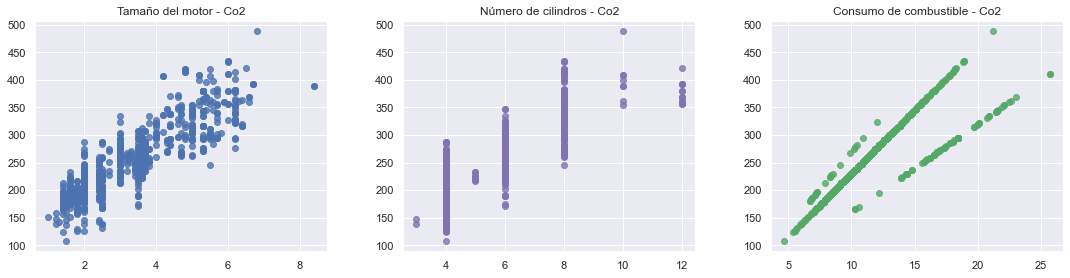

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
area = plt.figure(figsize=(16,5))

g1 = area.add_subplot(1,3,1)
g2 = area.add_subplot(1,3,2)
g3 = area.add_subplot(1,3,3)

g1.scatter(X_train[:,0], y_train, color='b', alpha=.8)
g1.set_title('Tamaño del motor - Co2')
plt.tight_layout(pad=1)

g2.scatter(X_train[:,1], y_train, color='m', alpha=.8)
g2.set_title('Número de cilindros - Co2')
plt.tight_layout(pad=4)

g3.scatter(X_train[:,2], y_train, color='g', alpha=.8)
g3.set_title('Consumo de combustible - Co2')
plt.tight_layout(pad=4)